## Random Forest Regressor (cc exg ch cv)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

### load data

In [3]:
with open("./data/train_data/grid_cc.npy", "rb") as fin:
    x_train_grid_cc = np.load(fin)

with open("./data/train_data/grid_exg.npy", "rb") as fin:
    x_train_grid_exg = np.load(fin)
    
with open("./data/train_data/grid_ch.npy", "rb") as fin:
    x_train_grid_ch = np.load(fin)
    
with open("./data/train_data/grid_cv.npy", "rb") as fin:
    x_train_grid_cv = np.load(fin)
    
with open("./data/train_data/yield_train.npy", "rb") as fin:
    y_train = np.load(fin)

In [4]:
print(x_train_grid_cc.shape)
print(x_train_grid_exg.shape)
print(x_train_grid_ch.shape)
print(x_train_grid_cv.shape)
print(y_train.shape)

(7240, 120)
(7240, 120)
(7240, 120)
(7240, 120)
(7240, 1)


In [5]:
with open("./data/test_data/grid_cc.npy", "rb") as fin:
    x_testset_cc = np.load(fin)

with open("./data/test_data/grid_exg.npy", "rb") as fin:
    x_testset_exg = np.load(fin)
    
with open("./data/test_data/grid_ch.npy", "rb") as fin:
    x_testset_ch = np.load(fin)
    
with open("./data/test_data/grid_cv.npy", "rb") as fin:
    x_testset_cv = np.load(fin)
    
with open("./data/test_data/yield_test.npy", "rb") as fin:
    y_testset = np.load(fin)

In [6]:
print(x_testset_cc.shape)
print(x_testset_exg.shape)
print(x_testset_ch.shape)
print(x_testset_cv.shape)
print(y_testset.shape)

(3983, 120)
(3983, 120)
(3983, 120)
(3983, 120)
(3983, 1)


#### yield kg/(100m2) => kg/ha

In [7]:
y_train = y_train / 0.01
y_testset = y_testset / 0.01

### train, validation, and test

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
def split_train_test(x, y, test_size=0.3):
    x_train, x_valid, y_train, y_valid = train_test_split(
        x, y, test_size=test_size, random_state=42
    )
    x_valid, x_test, y_valid, y_test = train_test_split(
        x_valid, y_valid, test_size=0.5, random_state=43
    )
    return x_train, x_valid, x_test, y_train, y_valid, y_test

In [10]:
x_train_grid_cc, x_valid_grid_cc, x_test_grid_cc, y_train_grid_cc, y_valid_grid_cc, y_test_grid_cc = split_train_test(x_train_grid_cc, y_train)

In [11]:
x_train_grid_exg, x_valid_grid_exg, x_test_grid_exg, y_train_grid_exg, y_valid_grid_exg, y_test_grid_exg = split_train_test(x_train_grid_exg, y_train)

In [12]:
x_train_grid_ch, x_valid_grid_ch, x_test_grid_ch, y_train_grid_ch, y_valid_grid_ch, y_test_grid_ch = split_train_test(x_train_grid_ch, y_train)

In [13]:
x_train_grid_cv, x_valid_grid_cv, x_test_grid_cv, y_train_grid_cv, y_valid_grid_cv, y_test_grid_cv = split_train_test(x_train_grid_cv, y_train)

In [14]:
all(y_train_grid_cc == y_train_grid_exg), all(y_train_grid_exg == y_train_grid_ch), all(y_train_grid_ch == y_train_grid_cv)

(True, True, True)

In [15]:
all(y_valid_grid_cc == y_valid_grid_exg), all(y_valid_grid_exg == y_valid_grid_ch), all(y_valid_grid_ch == y_valid_grid_cv)

(True, True, True)

In [16]:
all(y_test_grid_cc == y_test_grid_exg), all(y_test_grid_exg == y_test_grid_ch), all(y_test_grid_ch == y_test_grid_cv)

(True, True, True)

In [17]:
y_train = y_train_grid_cc
y_valid = y_valid_grid_cc
y_test = y_test_grid_cc

### rfr

In [18]:
from sklearn.ensemble import RandomForestRegressor

In [19]:
max_depth = [8, 16, 20, 30, 40, 50]

#### metrics

In [20]:
from sklearn.metrics import mean_squared_error
from scipy.stats import pearsonr

#### cc, exg, ch, cv

In [21]:
x_train_cxhv = np.concatenate(
    [x_train_grid_cc, x_train_grid_exg, x_train_grid_ch, x_train_grid_cv],
    axis=1,
)

x_train_cxhv.shape, y_train.shape

((5068, 480), (5068, 1))

In [22]:
x_valid_cxhv = np.concatenate(
    [x_valid_grid_cc, x_valid_grid_exg, x_valid_grid_ch, x_valid_grid_cv],
    axis=1,
)

x_valid_cxhv.shape, y_valid.shape

((1086, 480), (1086, 1))

In [23]:
x_test_cxhv = np.concatenate(
    [x_test_grid_cc, x_test_grid_exg, x_test_grid_ch, x_test_grid_cv],
    axis=1,
)

x_test_cxhv.shape, y_test.shape

((1086, 480), (1086, 1))

In [24]:
x_testset_cxhv = np.concatenate(
    [x_testset_cc, x_testset_exg, x_testset_ch, x_testset_cv],
    axis=1,
)

x_testset_cxhv.shape, y_testset.shape

((3983, 480), (3983, 1))

In [25]:
valid_preds = []
test_preds = []
cross_year_preds = []

for i in max_depth:
    rfr_model = RandomForestRegressor(max_depth=i, random_state=101+i)
    rfr_model.fit(x_train_cxhv, np.squeeze(y_train))
    valid_preds.append(rfr_model.predict(x_valid_cxhv))
    test_preds.append(rfr_model.predict(x_test_cxhv))
    cross_year_preds.append(rfr_model.predict(x_testset_cxhv))

In [26]:
# test_preds = []

# for i in max_depth:
#     rfr_model = RandomForestRegressor(max_depth=i, random_state=101+i)
#     preds = rfr_model.fit(x_train_cxhv, np.squeeze(y_train)).predict(x_test_cxhv)
#     # test_preds.append(preds)

In [27]:
# cross_year_preds = []

# for i in max_depth:
#     rfr_model = RandomForestRegressor(max_depth=i, random_state=101+i)
#     preds = rfr_model.fit(x_train_cxhv, np.squeeze(y_train)).predict(x_testset_cxhv)
#     cross_year_preds.append(preds)

### valid result summary

In [28]:
for i, valid_pred in enumerate(valid_preds):
    print(f"{max_depth[i]} valid rmse: {np.sqrt(mean_squared_error(y_valid, valid_pred)):.3f}")

8 valid rmse: 134.831
16 valid rmse: 125.198
20 valid rmse: 123.654
30 valid rmse: 123.419
40 valid rmse: 123.060
50 valid rmse: 124.405


In [29]:
for i, valid_pred in enumerate(valid_preds):
    print(f"{max_depth[i]} pearsonr: {pearsonr(np.squeeze(y_valid,-1), valid_pred)[0]:.3f}")

8 pearsonr: 0.923
16 pearsonr: 0.934
20 pearsonr: 0.936
30 pearsonr: 0.936
40 pearsonr: 0.937
50 pearsonr: 0.935


In [30]:
for i, valid_pred in enumerate(valid_preds):
    valid_rmse_p = np.sqrt(mean_squared_error(y_valid, valid_pred)) / np.mean(y_valid)
    print(f"{max_depth[i]} valid rmse%: {valid_rmse_p * 100:.2f}%")

8 valid rmse%: 7.37%
16 valid rmse%: 6.84%
20 valid rmse%: 6.76%
30 valid rmse%: 6.75%
40 valid rmse%: 6.73%
50 valid rmse%: 6.80%


### test result summary

In [31]:
for i, test_pred in enumerate(test_preds):
    print(f"{max_depth[i]} test rmse: {np.sqrt(mean_squared_error(y_test, test_pred)):.3f}")

8 test rmse: 131.960
16 test rmse: 121.293
20 test rmse: 120.951
30 test rmse: 120.473
40 test rmse: 119.976
50 test rmse: 119.887


In [32]:
for i, test_pred in enumerate(test_preds):
    print(f"{max_depth[i]} pearsonr: {pearsonr(np.squeeze(y_test,-1), test_pred)[0]:.3f}")

8 pearsonr: 0.929
16 pearsonr: 0.940
20 pearsonr: 0.941
30 pearsonr: 0.941
40 pearsonr: 0.942
50 pearsonr: 0.942


In [33]:
for i, test_pred in enumerate(test_preds):
    test_rmse_p = np.sqrt(mean_squared_error(y_test, test_pred)) / np.mean(y_test)
    print(f"{max_depth[i]} test rmse%: {test_rmse_p * 100:.2f}%")

8 test rmse%: 7.15%
16 test rmse%: 6.57%
20 test rmse%: 6.55%
30 test rmse%: 6.52%
40 test rmse%: 6.50%
50 test rmse%: 6.49%


### cross year summary

In [34]:
for i, cross_year_pred in enumerate(cross_year_preds):
    print(f"{max_depth[i]} test rmse: {np.sqrt(mean_squared_error(y_testset, cross_year_pred)):.3f}")

8 test rmse: 394.624
16 test rmse: 352.639
20 test rmse: 377.396
30 test rmse: 336.325
40 test rmse: 350.876
50 test rmse: 353.494


In [35]:
for i, cross_year_pred in enumerate(cross_year_preds):
    print(f"{max_depth[i]} pearsonr: {pearsonr(np.squeeze(y_testset,-1), cross_year_pred)[0]:.3f}")

8 pearsonr: 0.704
16 pearsonr: 0.728
20 pearsonr: 0.687
30 pearsonr: 0.705
40 pearsonr: 0.683
50 pearsonr: 0.696


In [36]:
for i, cross_year_pred in enumerate(cross_year_preds):
    cross_year_rmse_p = np.sqrt(mean_squared_error(y_testset, cross_year_pred)) / np.mean(y_testset)
    print(f"{max_depth[i]} test rmse%: {cross_year_rmse_p * 100:.2f}%")

8 test rmse%: 51.21%
16 test rmse%: 45.76%
20 test rmse%: 48.98%
30 test rmse%: 43.65%
40 test rmse%: 45.53%
50 test rmse%: 45.87%


In [37]:
rfr_model = RandomForestRegressor(max_depth=30, random_state=70)

In [38]:
rfr_model.fit(x_train_cxhv, np.squeeze(y_train))

valid_pred = rfr_model.predict(x_valid_cxhv)
test_pred = rfr_model.predict(x_test_cxhv)
cross_year_pred = rfr_model.predict(x_testset_cxhv)

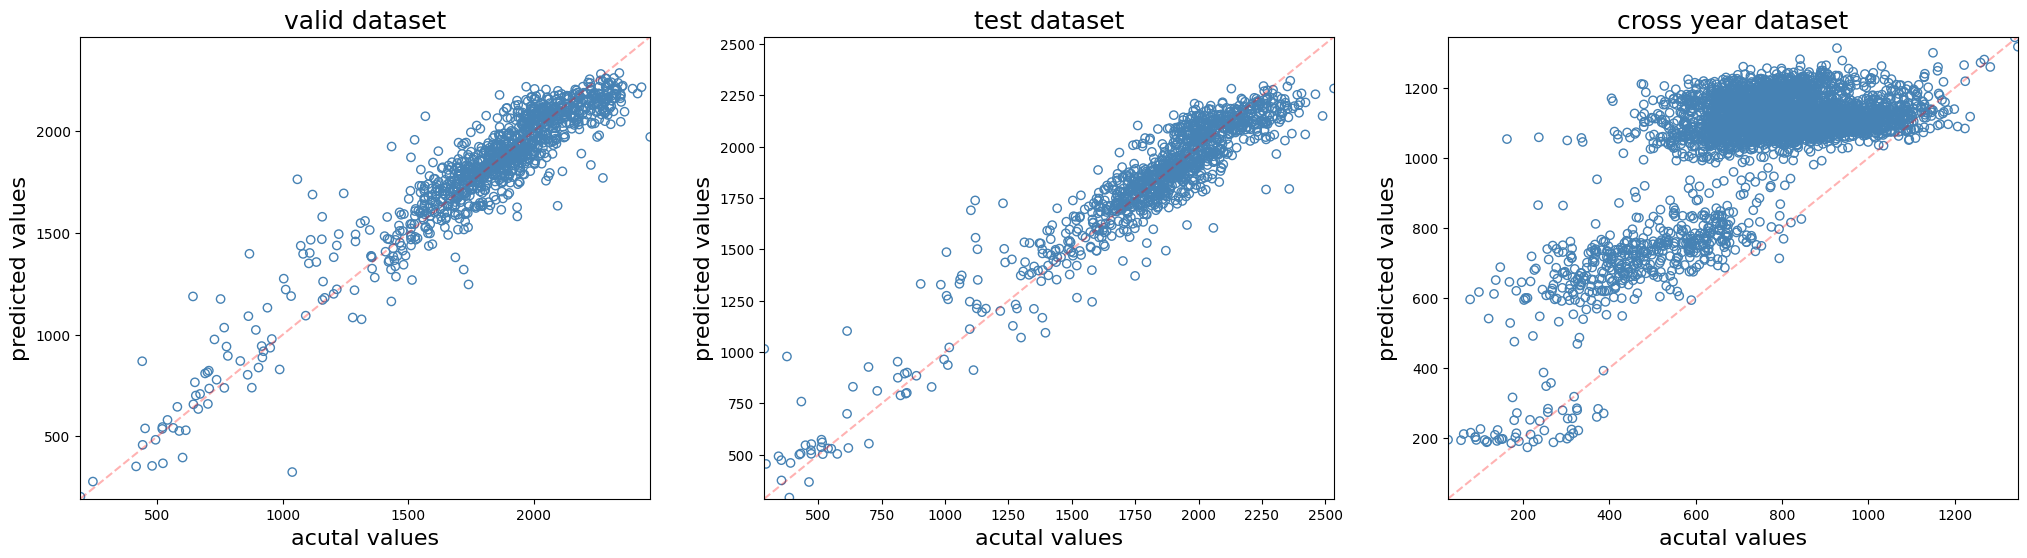

In [39]:
fig, axes = plt.subplots(ncols=3, figsize=(25, 6))

valid_min = np.min([y_valid.min(), valid_pred.min()])
valid_max = np.max([y_valid.max(), valid_pred.max()])
axes[0].scatter(y_valid, valid_pred, facecolors="none", edgecolors="steelblue");
axes[0].set_xlim([valid_min, valid_max])
axes[0].set_ylim([valid_min, valid_max])
axes[0].set_title("valid dataset", fontsize=18);
axes[0].set_xlabel("acutal values", fontsize=16);
axes[0].set_ylabel("predicted values", fontsize=16);
axes[0].plot([valid_min, valid_max], [valid_min, valid_max], linestyle="--", color="red", alpha=0.3);

test_min = np.min([y_test.min(), test_pred.min()])
test_max = np.max([y_test.max(), test_pred.max()])
axes[1].scatter(y_test, test_pred, facecolors="none", edgecolors="steelblue");
axes[1].set_xlim([test_min, test_max])
axes[1].set_ylim([test_min, test_max])
axes[1].set_title("test dataset", fontsize=18);
axes[1].set_xlabel("acutal values", fontsize=16);
axes[1].set_ylabel("predicted values", fontsize=16);
axes[1].plot([test_min, test_max], [test_min, test_max], linestyle="--", color="red", alpha=0.3);

cross_year_min = np.min([y_testset.min(), cross_year_pred.min()])
cross_year_max = np.max([y_testset.max(), cross_year_pred.max()])
axes[2].scatter(y_testset, cross_year_pred, facecolors="none", edgecolors="steelblue");
axes[2].set_xlim([cross_year_min, cross_year_max])
axes[2].set_ylim([cross_year_min, cross_year_max])
axes[2].set_title("cross year dataset", fontsize=18);
axes[2].set_xlabel("acutal values", fontsize=16);
axes[2].set_ylabel("predicted values", fontsize=16);
axes[2].plot([cross_year_min, cross_year_max], [cross_year_min, cross_year_max], linestyle="--", color="red", alpha=0.3);